# Handwritten Digit Recognition using Classical Machine Learning

## 1. Introduction
This project aims to classify handwritten digit images (0–9) using classical machine learning techniques.

## 2. Dataset Description
The dataset is a subset of the MNIST handwritten digit dataset provided in CSV format.

## 3. Data Loading and Exploration



## 4. Data Preprocessing

## 5. Model Implementation
### 5.1 K-Nearest Neighbors (From Scratch)
### 5.2 K-Nearest Neighbors (scikit-learn)
### 5.3 Support Vector Machine
### 5.4 Decision Tree

## 6. Model Evaluation




## 7. Results and Analysis

### Model Performance Comparison and Analysis

Among the three classical machine learning models used, the Support Vector Machine (SVM) achieved the highest accuracy. This is because SVM is well-suited for high-dimensional data like images and can create optimal decision boundaries between digit classes. K-Nearest Neighbors (KNN) also performed well but was computationally expensive and sensitive to visually similar samples. The Decision Tree model showed lower accuracy due to its tendency to overfit pixel-level features.

Misclassifications were commonly observed between visually similar digits such as 7 and 9, 5 and 3, and 2 and 7. In many cases, unclear handwriting, curved strokes, or incomplete digit shapes made correct classification difficult.

Performance could be further improved by using dimensionality reduction techniques such as PCA, tuning hyperparameters more extensively, or increasing the size and diversity of training data.




## 8. Conclusion

In this project, classical machine learning techniques were successfully applied to handwritten digit recognition using the MNIST dataset. Among the models evaluated, Support Vector Machine achieved the best performance due to its effectiveness in handling high-dimensional image data. The project demonstrates a complete machine learning pipeline including data preprocessing, model implementation from scratch, evaluation, and result analysis.



## Execution Flow Diagram





<img src="./flow_diagram.png" width="700"/>






In [1]:
# ===============================
# Imports
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [2]:
# ===============================
# Load the dataset
# ===============================

# IMPORTANT:
# Change the filename if your CSV name is different
data = pd.read_csv("mnist_train.csv")
data.head()


# Display first 5 rows



,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# ===============================
# Dataset statistics
# ===============================

# Total number of samples
print("Total samples:", data.shape[0])

# Number of features
print("Total columns:", data.shape[1])

# Class distribution
print("\nClass distribution:")
print(data['label'].value_counts().sort_index())

# Check for missing values
print("\nMissing values:", data.isnull().sum().sum())


Total samples: 60000
Total columns: 785

Class distribution:
label
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64

Missing values: 0


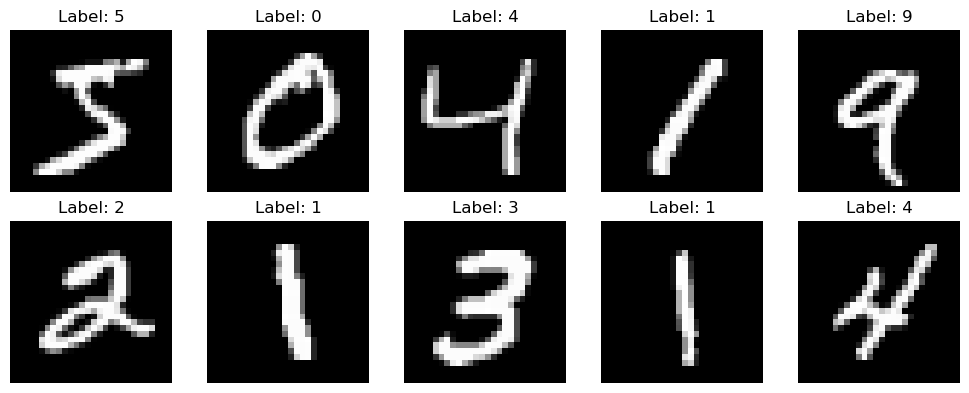

In [4]:
# ===============================
# Visualize sample handwritten digits
# ===============================

plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    # Extract pixel values and reshape to 28x28
    image = data.iloc[i, 1:].values.reshape(28, 28)
    
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {data.iloc[i, 0]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [5]:
# ===============================
# Data Preprocessing
# ===============================

# Separate features and labels
X = data.iloc[:, 1:].values   # pixel values
y = data.iloc[:, 0].values   # labels

# Normalize pixel values to range 0-1
X = X / 255.0

print("Feature shape:", X.shape)
print("Label shape:", y.shape)


Feature shape: (60000, 784)
Label shape: (60000,)


In [6]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 48000
Testing samples: 12000


In [7]:
# ===============================
# Subset data for KNN from scratch (for efficiency)
# ===============================

# Use a smaller subset to make KNN computation feasible
X_train_small = X_train[:2000]
y_train_small = y_train[:2000]

X_test_small = X_test[:200]
y_test_small = y_test[:200]

print("Training subset:", X_train_small.shape)
print("Testing subset:", X_test_small.shape)


Training subset: (2000, 784)
Testing subset: (200, 784)


In [8]:
# ===============================
# KNN from Scratch Implementation
# ===============================

# K-Nearest Neighbors implemented from scratch without using any ML training library


import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    
    for test_point in X_test:
        distances = []
        
        for train_point, label in zip(X_train, y_train):
            dist = euclidean_distance(test_point, train_point)
            distances.append((dist, label))
        
        # Sort by distance
        distances.sort(key=lambda x: x[0])
        
        # Get k nearest labels
        k_nearest_labels = [label for _, label in distances[:k]]
        
        # Majority voting
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        predictions.append(most_common)
    
    return np.array(predictions)



In [9]:
# ===============================
# Evaluate KNN from scratch
# ===============================

k = 3
y_pred_knn_scratch = knn_predict(
    X_train_small, y_train_small, X_test_small, k=k
)

accuracy = np.mean(y_pred_knn_scratch == y_test_small)
print(f"KNN from scratch accuracy (k={k}): {accuracy:.4f}")


KNN from scratch accuracy (k=3): 0.9050


In [10]:
# ===============================
# KNN using scikit-learn
# ===============================

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Train
knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# Accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN (sklearn) Accuracy:", knn_accuracy)


KNN (sklearn) Accuracy: 0.9675


In [11]:
# ===============================
# Support Vector Machine (SVM)
# ===============================

from sklearn.svm import SVC

# Initialize SVM
svm = SVC(kernel="rbf", C=10, gamma=0.01)

# Train
svm.fit(X_train, y_train)

# Predict
y_pred_svm = svm.predict(X_test)

# Accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.9815833333333334


In [12]:
# ===============================
# Decision Tree
# ===============================

from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree
dt = DecisionTreeClassifier(max_depth=15, min_samples_split=10, random_state=42)

# Train
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)


Decision Tree Accuracy: 0.8689166666666667


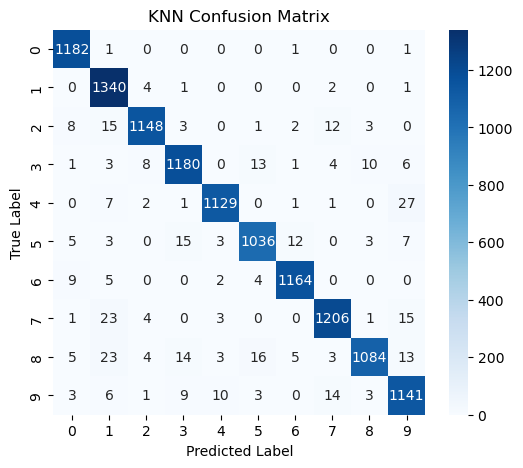

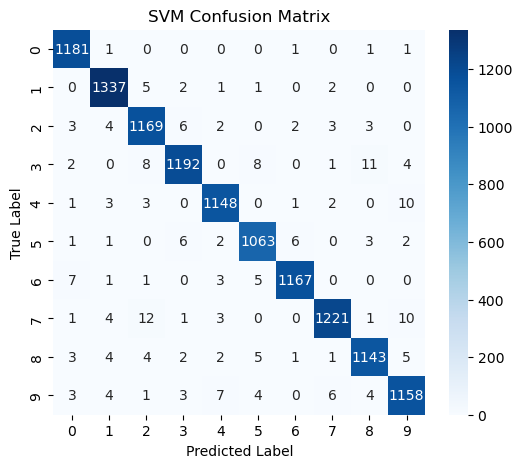

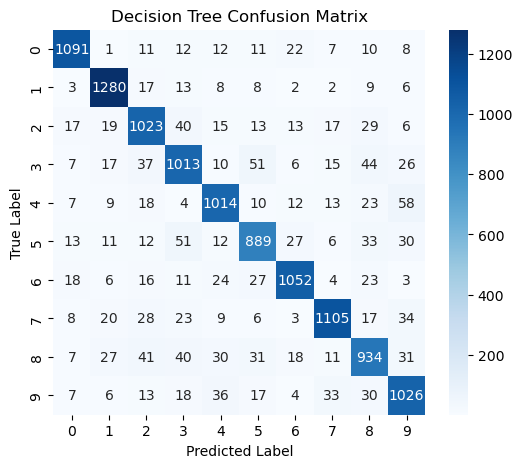

In [13]:
# ===============================
# Confusion Matrices
# ===============================

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_knn, "KNN Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_svm, "SVM Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")


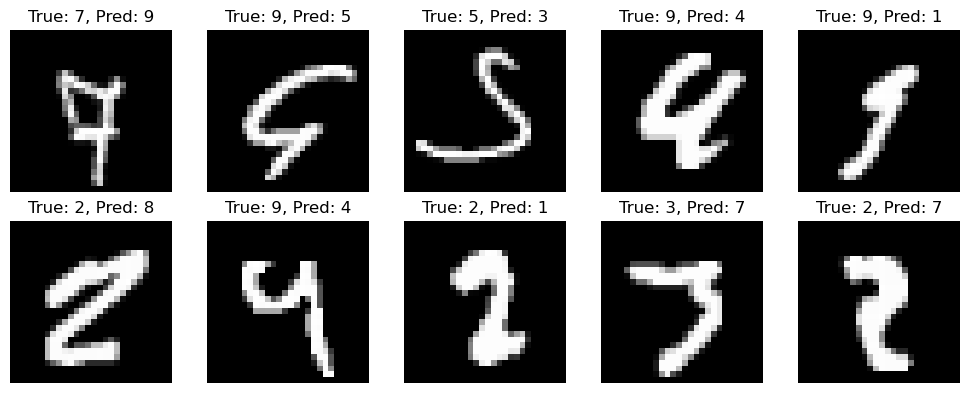

In [14]:
# ===============================
# Visualize misclassified images (SVM)
# ===============================

# Find misclassified indices
misclassified_idx = np.where(y_test != y_pred_svm)[0][:10]

plt.figure(figsize=(10, 4))

for i, idx in enumerate(misclassified_idx):
    plt.subplot(2, 5, i + 1)
    
    image = X_test[idx].reshape(28, 28)
    plt.imshow(image, cmap="gray")
    
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred_svm[idx]}")
    plt.axis("off")

plt.tight_layout()
plt.show()
